Regression using numpy, sklearn and tensorflow. 

In [40]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
import tensorflow as tf

In [41]:
# Normalize features
def featureNormalize(X):
    X_norm = X
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):
        mu[:,i] = np.mean(X[:,i])
        sigma[:,i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return X_norm, mu, sigma

In [42]:
# Compute the loss
def computeLoss(X,y,theta): 
  m=len(y)
  Loss=0.0;
  Loss=1.0/2.0/m*np.sum((X.dot(theta)-y)**2);
  return Loss;

In [43]:
# Solves using Gradient Descent
def gradientDescent(X, y, alpha, num_iters):
    m,n = X.shape
    theta = np.zeros((X.shape[1],1))
    Loss_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))    
        Loss_history[i] = computeLoss(X, y, theta)
    return theta, Loss_history

In [44]:
# Solve using direct method
def normalEqn(X, y):  
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return theta

In [45]:
def SolveGradientDescent(X,y,alpha, num_iters):
    m,n=X.shape
    theta, Loss_history = gradientDescent(X, y, alpha, num_iters)
    plt.plot(range(Loss_history.size), Loss_history, "-b", linewidth=2 )
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.show(block=False)
    theta.shape
    return theta

In [46]:
def SK_solve(X,y):
    lr = linear_model.LinearRegression()
    lr.fit(X,y)
    return lr

In [47]:
def TF_solve(X,y,learning_rate,training_epochs):
    mx,nx = X.shape
    my,ny = y.shape
    x_ph = tf.placeholder(tf.float32, shape = [None, nx])
    y_ph = tf.placeholder(tf.float32, shape = [None, ny])

    W = tf.Variable(tf.random_normal([nx,1]), name="Weight")
    b = tf.Variable(tf.random_normal([ny,1]), name="Intercept")

    hypothesis = tf.matmul(x_ph, W) + b
    init = tf.global_variables_initializer()
    Loss = tf.reduce_mean(tf.square(y_ph - hypothesis))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate= learning_rate)
    train = optimizer.minimize(Loss)
    sess = tf.Session()
    # Initialize all the variables
    sess.run(init)
    Loss_history = np.zeros((training_epochs, 1))
    counter=0
    for epochs in range(training_epochs):
        cost_val, hy_val, W_val, b_val, _ = sess.run([Loss, hypothesis, W, b, train],feed_dict = {x_ph:X, y_ph:y})
        Loss_history[counter] = cost_val
        counter=counter+1
    plt.plot(range(Loss_history.size), Loss_history, "-b", linewidth=2 )
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.show(block=False)
    return W_val,b_val

Try out the code on a simple data file "data.txt"

In [48]:
data = np.loadtxt('data.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)
X_norm, mu, sigma = featureNormalize(X)
X_padded = np.column_stack((np.ones((m,1)), X_norm))
house_norm_padded = np.array([1, 1650, 3])

Solve using Gradient Descent

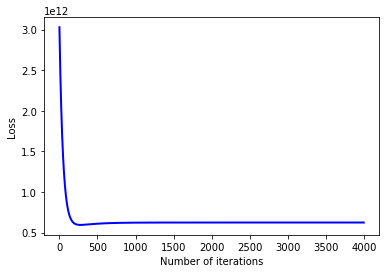

Theta computed from gradient descent:  [[ 340412.65957447]
 [ 109447.79520343]
 [  -6578.35358795]]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): [  1.80909540e+08]


In [49]:

theta_GD=SolveGradientDescent(X=X_padded,y=y,alpha=0.01,num_iters=4000)
#Display gradient descent's result
print('Theta computed from gradient descent: ',theta_GD)
price_GD = np.array(house_norm_padded).dot(theta_GD)
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):", price_GD)


Solve using normal equation

In [50]:
theta_Normal = normalEqn(X_padded, y)
print("Theta calculated by Normal Equation ",theta_Normal)
price_Normal = np.array(house_norm_padded).dot(theta_Normal)
print("Predicted price of a 1650 sq-ft, 3 br house (using normal equation):", price_Normal)

Theta calculated by Normal Equation  [ 340412.65957447  109447.79646964   -6578.35485416]
Predicted price of a 1650 sq-ft, 3 br house (using normal equation): 180909541.77


Solve using SK-learn

In [51]:
lr=SK_solve(X_padded,y)
print("Theta calculated by SK-learn regression ",lr.coef_)
print("Predicted price ",lr.predict(house_norm_padded.reshape(1,-1)))

Theta calculated by SK-learn regression  [      0.          109447.79646964   -6578.35485416]
Predicted price  [  1.80909542e+08]


Solve using Tensorflow

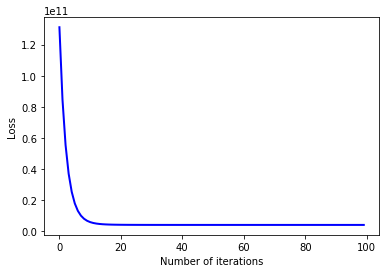

Theta calculated by tensorflow regression  [[ 340412.59375]] [[ 109442.        ]
 [  -6572.56298828]]
Predicted price  [[  1.80899995e+08]]


In [52]:
theta_TF,bias_TF=TF_solve(X_norm,y.reshape(-1,1),0.1,100)
print("Theta calculated by tensorflow regression ",bias_TF,theta_TF)
house_norm_padded = np.array([1650, 3])
print("Predicted price ",np.array(house_norm_padded).dot(theta_TF)+bias_TF)

Play around with the realistic diabetes database from SK-learn

In [83]:
diabetes = datasets.load_diabetes()
# Use only one feature
#diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]#.reshape(-1,1)
diabetes_y_test = diabetes.target[-20:]#.reshape(-1,1)
X=diabetes_X_train
y=diabetes_y_train
X_test=diabetes_X_test
y_test=diabetes_y_test

(442, 10)


In [85]:
#Solve using SK-Learn library
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
#plt.scatter(X, y,  color='red')
#plt.plot(X_test, regr.predict(X_test), color='blue',
#         linewidth=3)
#plt.xticks(())
#plt.yticks(())
#plt.show()

Coefficients: 
 [  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]
Mean squared error: 2004.57
Variance score: 0.59


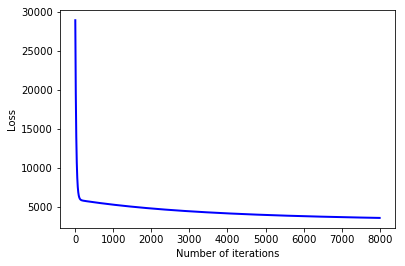

Theta calculated by tensorflow regression  [[ 153.16256714]] [[  49.67566681]
 [ -22.35087204]
 [ 222.85746765]
 [ 158.22416687]
 [  40.54036713]
 [  20.52059746]
 [-132.00691223]
 [ 126.51502991]
 [ 200.47679138]
 [ 120.73849487]]
Mean squared error: 6632.51509775


In [86]:
#Solve using Tensorflow
theta_TF,bias_TF=TF_solve(X,y.reshape(-1,1),0.01,8000)
print("Theta calculated by tensorflow regression ",bias_TF,theta_TF)
print("Mean squared error:",np.mean((np.array(X_test).dot(theta_TF)+bias_TF - y_test) ** 2))
# Plot outputs
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, np.array(X_test).dot(theta_TF)+bias_TF, color='blue',linewidth=3)
#plt.xticks(())
#plt.yticks(())
#plt.show()

In [87]:
#Solve using Normal Equation
X = np.column_stack((np.ones((len(y),1)), X))
X_test  = np.column_stack((np.ones((len(y_test),1)), X_test))
theta_Normal=normalEqn(X, y)
# The coefficients
print('Coefficients using Normal Equations: \n', theta_Normal)
# The mean squared error
print("Mean squared error:",np.mean((np.array(X_test).dot(theta_Normal) - y_test) ** 2))

Coefficients using Normal Equations: 
 [  1.52764307e+02   3.03499549e-01  -2.37639315e+02   5.10530605e+02
   3.27736980e+02  -8.14131709e+02   4.92814588e+02   1.02848452e+02
   1.84606489e+02   7.43519617e+02   7.60951722e+01]
Mean squared error: 2004.56760269


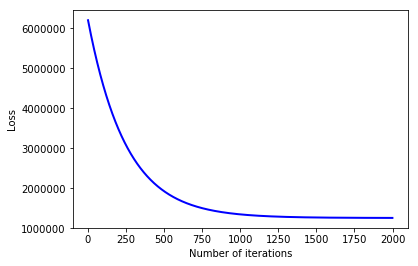

Coefficients using GD: 
 [[ 75.28120739]
 [ 75.28120739]
 [  1.41566321]
 [  0.24830061]
 [  4.25853817]
 [  3.21468106]
 [  1.52741599]
 [  1.23715368]
 [ -2.85742329]
 [  3.16247818]
 [  4.12083866]
 [  2.77252797]]
Mean squared error: 5422.0671162


In [88]:
#Solve using Gradient Descent
X = np.column_stack((np.ones((len(y),1)), X))
X_test  = np.column_stack((np.ones((len(y_test),1)), X_test))
theta_GD=SolveGradientDescent(X=X,y=y,alpha=0.001,num_iters=2000)
# The coefficients
print('Coefficients using GD: \n', theta_GD)
# The mean squared error
print("Mean squared error:",np.mean((np.array(X_test).dot(theta_GD) - y_test) ** 2))